In [1]:
import pandas as pd
import numpy as np
import nltk 
import re
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
os.chdir("P:\Courses\Kaggle\Fake News Classifier")

In [3]:
data=pd.read_csv("news_articles.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [5]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


# EDA

In [6]:
data.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1294.0  0.736476  0.440714  0.0  0.0  1.0  1.0  1.0
Real     801.0  0.842697  0.364314  0.0  1.0  1.0  1.0  1.0

<AxesSubplot:>

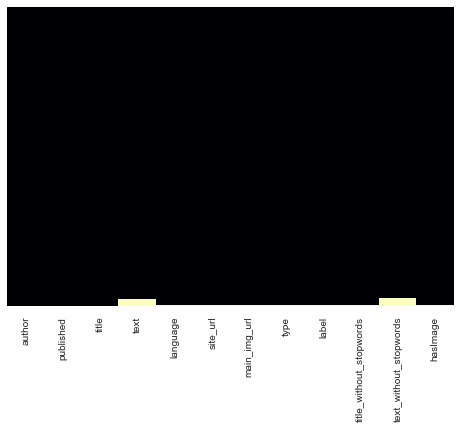

In [7]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='magma')

In [8]:
data=data.dropna()

In [9]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [10]:
data['text_len'] = data['text'].apply(len)

In [11]:
data['len_title'] = data['title'].apply(len)

In [12]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [13]:
AV = AutoViz_Class()

Shape of your Data Set: (2045, 14)
Classifying variables in data set...
    13 Predictors classified...
        This does not include the Target column(s)
    8 variables removed since they were ID or low-information variables
    List of variables removed: ['title', 'text', 'main_img_url', 'title_without_stopwords', 'text_without_stopwords', 'author', 'published', 'site_url']
Total Number of Scatter Plots = 3
Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 4.850


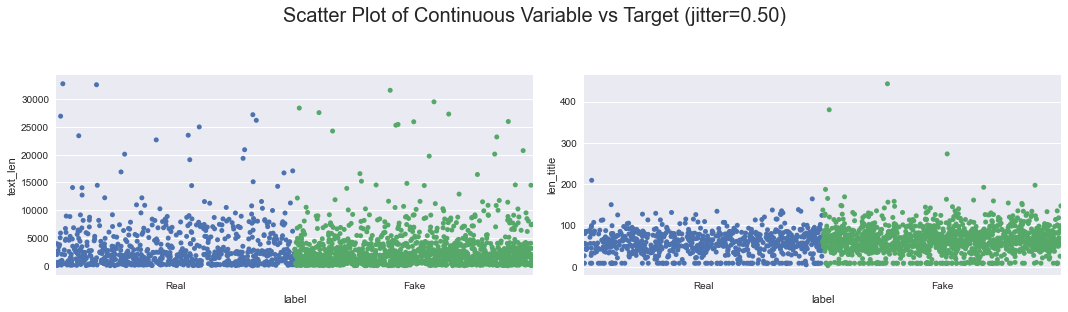

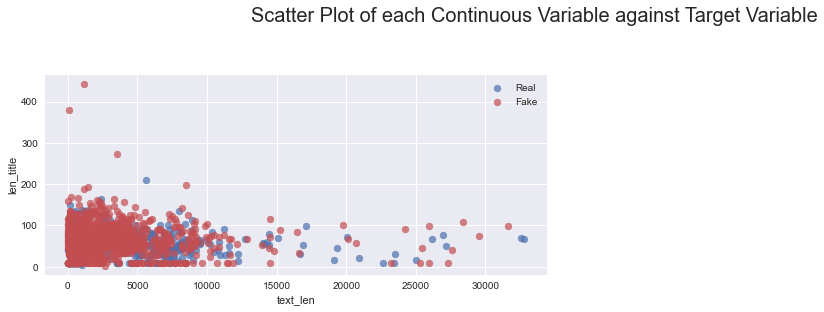

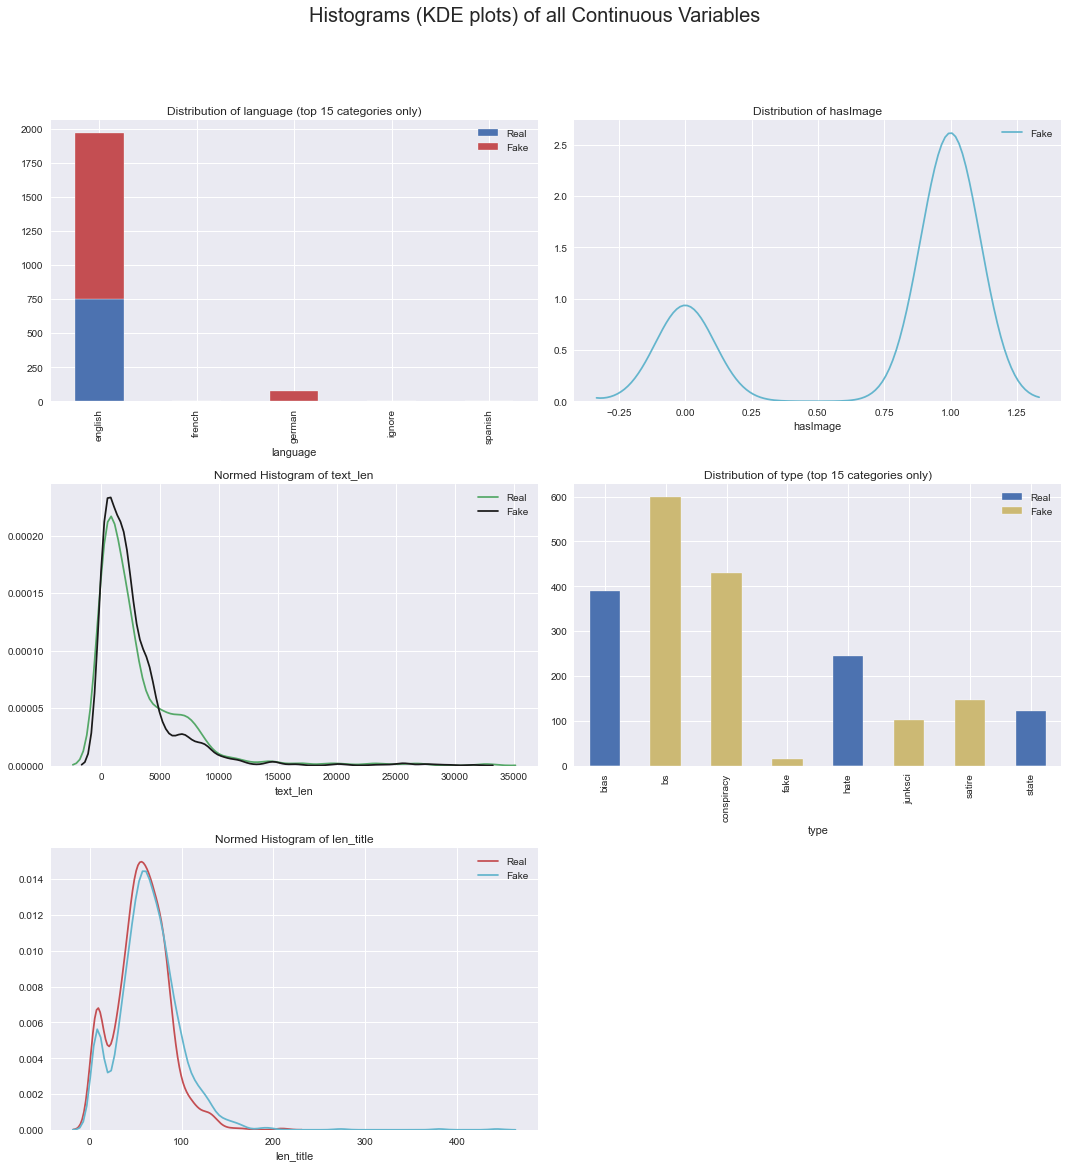

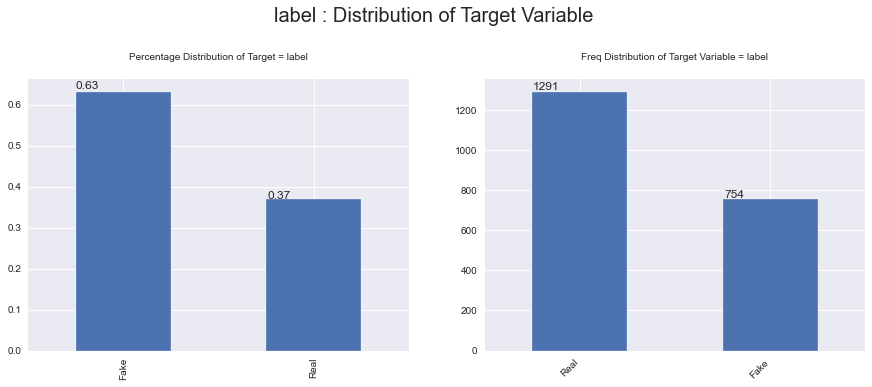

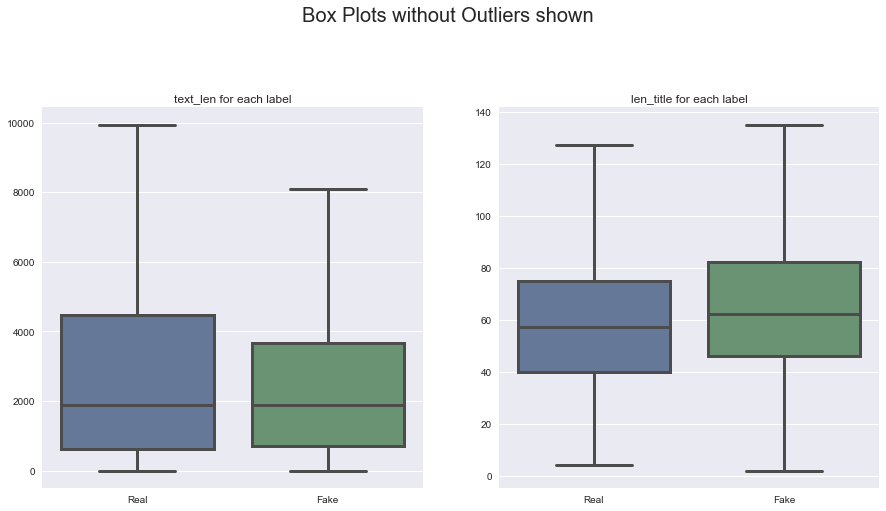

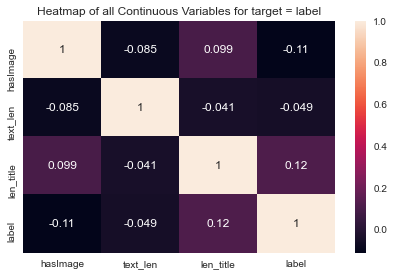

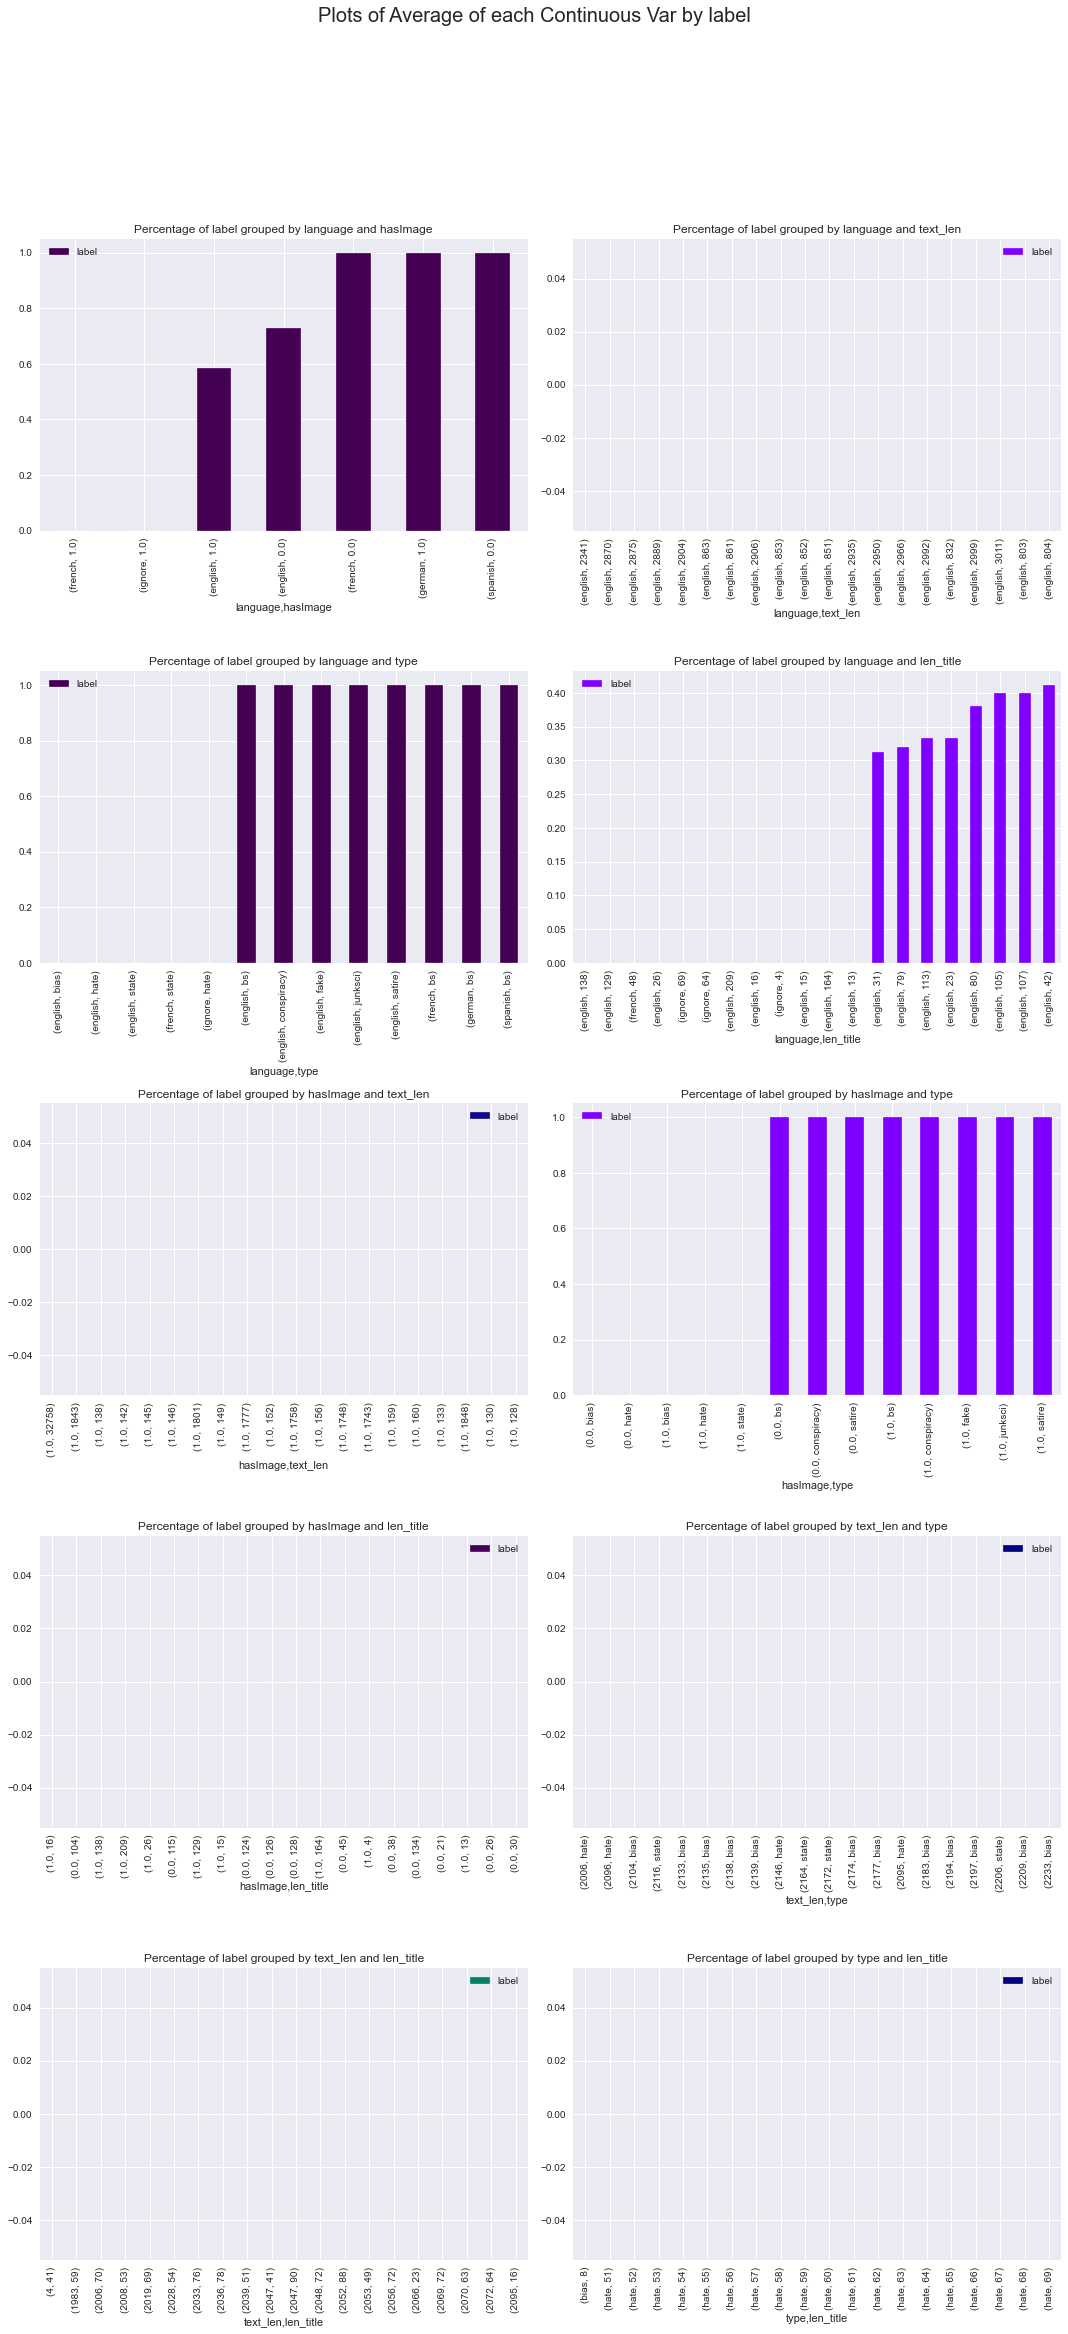

In [14]:
df = AV.AutoViz(filename="",sep=',', depVar='label', dfte=data, header=0, verbose=2, 
                 lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

<AxesSubplot:ylabel='type'>

([<matplotlib.axis.XTick at 0x22ba5a17208>,
 [Text(0, 0, 'bs'),
  Text(1, 0, 'conspiracy'),
  Text(2, 0, 'bias'),
  Text(3, 0, 'hate'),
  Text(4, 0, 'satire'),
  Text(5, 0, 'state'),
  Text(6, 0, 'junksci'),
  Text(7, 0, 'fake')])

Text(0.5, 1.0, 'Article type count')

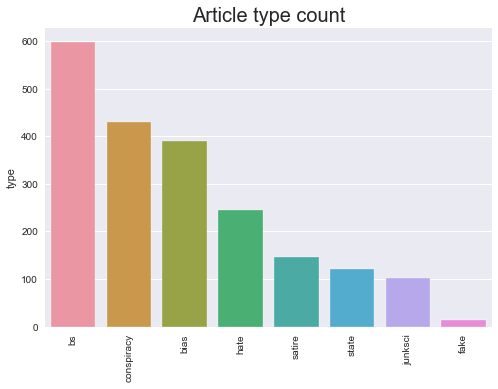

In [15]:
# Plot article type distribution
df_type = data['type'].value_counts()
sns.barplot(np.arange(len(df_type)), df_type)
plt.xticks(np.arange(len(df_type)), df_type.index.values.tolist(), rotation=90)
plt.title('Article type count', fontsize=20)
plt.show()

In [19]:
from nltk.corpus import stopwords
import string
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Perform lemmatization
    4. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    lemma = nlp.WordNetLemmatizer()
    nopunc = [ lemma.lemmatize(word) for word in nopunc]

In [20]:
data['title'].apply(text_process)

0       [muslims, busted, stole, millions, govt, benef...
1       [attorney, general, loretta, lynch, plead, fifth]
2       [breaking, weiner, cooperating, fbi, hillary, ...
3       [pin, drop, speech, father, daughter, kidnappe...
4       [fantastic, trumps, point, plan, reform, healt...
                              ...                        
2041                  [never, trumpers, must, reconsider]
2042        [election, crossroads, socialism, capitalism]
2043                          [reasons, ill, vote, trump]
2044      [new, country, women, minorities, hit, hardest]
2045             [trump, vs, clinton, risk, vs, disaster]
Name: title, Length: 2045, dtype: object

In [22]:
data['text'].head(5).apply(text_process)

0    [print, pay, back, money, plus, interest, enti...
1    [attorney, general, loretta, lynch, plead, fif...
2    [red, state, fox, news, sunday, reported, morn...
3    [email, kayla, mueller, prisoner, tortured, is...
4    [email, healthcare, reform, make, america, gre...
Name: text, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

47110


In [24]:
messages_bow = bow_transformer.transform(data['text'])

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(2045, 47110)


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(data.label)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, label_train, label_test = train_test_split(data['text'], y, test_size=0.2, random_state = 42)

print(len(X_train), len(X_test), len(X_train) + len(X_test))

1636 409 2045


# CLASSIFICATION MODELS :

# 1.Naive Bayes

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, data['label'])

In [33]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [34]:
pipeline.fit(X_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022BA2F5E1F8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [35]:
predictions1 = pipeline.predict(X_test)

In [36]:
print(classification_report(predictions1,label_test))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79       396
           1       0.08      0.85      0.14        13

    accuracy                           0.67       409
   macro avg       0.53      0.75      0.47       409
weighted avg       0.96      0.67      0.77       409



# 2. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=0)
classifier.fit(messages_tfidf, data['label'])

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [38]:
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [39]:
pipeline_rf.fit(X_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022BA2F5E1F8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [40]:
predictions2 = pipeline_rf.predict(X_test)

In [41]:
print(classification_report(predictions2,label_test))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       320
           1       0.52      0.84      0.64        89

    accuracy                           0.79       409
   macro avg       0.73      0.81      0.75       409
weighted avg       0.85      0.79      0.81       409



# 3. Logistic Model

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(messages_tfidf, data['label'])

LogisticRegression()

In [43]:
pipeline_lr = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ SVM
])

In [44]:
pipeline_lr.fit(X_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022BA2F5E1F8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [45]:
predictions3 = pipeline_lr.predict(X_test)

In [46]:
print(classification_report(predictions3,label_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       351
           1       0.30      0.76      0.43        58

    accuracy                           0.72       409
   macro avg       0.63      0.74      0.62       409
weighted avg       0.86      0.72      0.76       409



# 4. Neural Networks

In [47]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(random_state=1)

In [48]:
pipeline_nn = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [49]:
pipeline_nn.fit(X_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022BA2F5E1F8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MLPClassifier())])

In [50]:
predictions4 = pipeline_nn.predict(X_test)

In [56]:
print(classification_report(predictions4,label_test))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       284
           1       0.57      0.66      0.61       125

    accuracy                           0.74       409
   macro avg       0.70      0.72      0.71       409
weighted avg       0.75      0.74      0.75       409



# 5. Decision Trees

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)

In [52]:
pipeline_dt = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [53]:
pipeline_dt.fit(X_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022BA2F5E1F8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [54]:
predictions_dt = pipeline_dt.predict(X_test)

In [55]:
print(classification_report(predictions_dt,label_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       259
           1       0.64      0.62      0.63       150

    accuracy                           0.73       409
   macro avg       0.71      0.71      0.71       409
weighted avg       0.73      0.73      0.73       409



# 6. Gradient Boosting 

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.3,max_depth=4,n_estimators=100 ,random_state=0)

In [58]:
pipeline_gbm = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', GradientBoostingClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [59]:
pipeline_gbm.fit(X_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022BA2F5E1F8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', GradientBoostingClassifier())])

In [60]:
predictions_gbm = pipeline_gbm.predict(X_test)

In [61]:
print(classification_report(predictions_gbm,label_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       302
           1       0.59      0.79      0.67       107

    accuracy                           0.80       409
   macro avg       0.75      0.80      0.76       409
weighted avg       0.83      0.80      0.81       409

